In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
comments = pd.read_csv(r'E:\Data Science 12 Projects\data/UScomments.csv',
                       error_bad_lines=False)


C:\Users\rober\AppData\Local\Temp\ipykernel_22464\1741893075.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r'E:\Data Science 12 Projects\data/UScomments.csv',
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\rober\AppData\Local\Temp\ipykernel_22464\1741893075.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'E:\Data Science 12 Projects\data/UScomments.csv',


In [4]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
comments.isnull().sum()


video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

Drop de Nulls in the dataset

In [6]:
comments.dropna(inplace=True)

In [7]:
comments.isnull().sum()


video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [8]:
%pip install textblob

You should consider upgrading via the 'E:\Data Science 12 Projects\.modules\Scripts\python.exe -m pip install --upgrade pip' command.


In [9]:
from textblob import TextBlob

In [10]:
df=comments[0:10000]

In [11]:
polarity=[]
for comment in comments['comment_text']:
    try:
        analysis=TextBlob(comment)
        polarity.append(analysis.sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

adding polarity column to the dataframe
show the polarity of the comments

In [13]:
comments['polarity']=polarity 
comments.head(15)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [14]:
comments['polarity'].describe()

count    691375.000000
mean          0.137812
std           0.342138
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.342130
max           1.000000
Name: polarity, dtype: float64

In [15]:
comment_positive=comments[comments['polarity'] == 1]
comment_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [16]:
comment_negative = comments[comments['polarity'] == -1]
comment_negative.head()


,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [17]:
%pip install wordcloud

You should consider upgrading via the 'E:\Data Science 12 Projects\.modules\Scripts\python.exe -m pip install --upgrade pip' command.


In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
total_comments_negative = ''.join(comment_negative['comment_text'])

In [20]:
total_comments_negative[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!!W"

In [21]:
total_comments_positive = ''.join(comment_positive['comment_text'])

In [22]:
total_comments_positive[0:100]

'yu are the bestPower is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best'

Create the WordCloud - we use the stopwords from the NLTK library

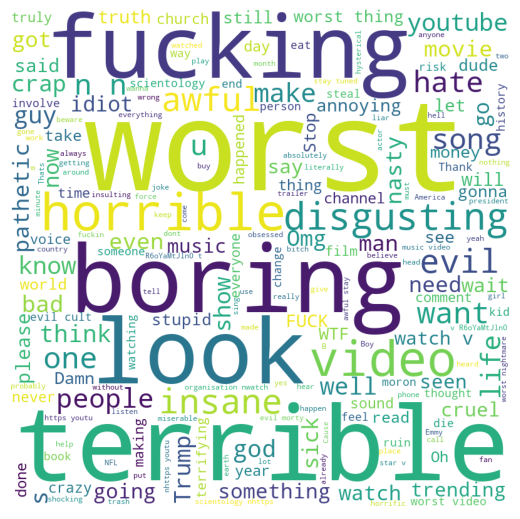

In [23]:
wordcloud_negative = WordCloud(width = 800, height = 800, stopwords=set(STOPWORDS), background_color ='white', min_font_size = 10).generate(total_comments_negative)
plt.figure(figsize = (15, 5), facecolor = None)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

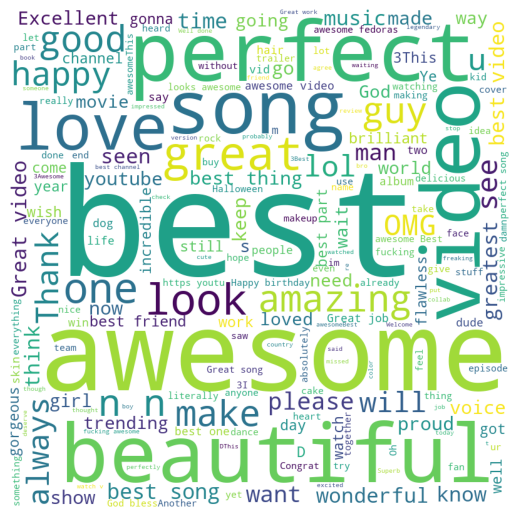

In [24]:
wordcloud_positive = WordCloud(width=800, height=800, stopwords=set(
    STOPWORDS), background_color='white', min_font_size=10).generate(total_comments_positive)
plt.figure(figsize=(15, 5), facecolor=None)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Perfom Emojis analysis - we use the emojis library to extract the emojis from the comments  and count them  

In [25]:
%pip install emoji

You should consider upgrading via the 'E:\Data Science 12 Projects\.modules\Scripts\python.exe -m pip install --upgrade pip' command.


In [26]:
import emoji

In [27]:
print('\U0001f600')
print(emoji.emojize('Python is :thumbs_up:'))

😀
Python is 👍


you need to install the emojis library first then you import collections to count the emojis

get_emojis_1str = lambda word_list: collections.Counter([match["emoji"] for word in word_list for match in emoji.emoji_list(word)])

In [28]:
emoji_list = []
for comment in comments['comment_text']:
    for match in emoji.emoji_list(comment):
        emoji_list.append(match['emoji'])

In [29]:
emoji_list[0:10]

['‼️', '‼️', '‼️', '😉', '😭', '👍🏻', '❤️', '😍', '💋', '💙']

In [30]:
len(emoji_list)


288866

Create a Frequency Distribution of the emojis

In [31]:
from collections import Counter

In [32]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤️', 16911),
 ('❤', 14167),
 ('🔥', 8694),
 ('😭', 8398),
 ('😘', 5545),
 ('💖', 5359),
 ('💕', 5147),
 ('👍', 4251)]

In [33]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [34]:
emojis

['😂', '😍', '❤️', '❤', '🔥', '😭', '😘', '💖', '💕', '👍']

In [35]:
emoji_count = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [36]:
emoji_count

[36987, 33453, 16911, 14167, 8694, 8398, 5545, 5359, 5147, 4251]

In [37]:
%pip install plotly

You should consider upgrading via the 'E:\Data Science 12 Projects\.modules\Scripts\python.exe -m pip install --upgrade pip' command.


In [51]:
import plotly.graph_objects as go

In [56]:
from plotly.offline import init_notebook_mode, iplot, plot

In [59]:
trace = go.Bar(x=emojis, y=emoji_count, marker=dict(color='rgb(3, 173, 252)'))


In [49]:
%pip install ipykernel


You should consider upgrading via the 'E:\Data Science 12 Projects\.modules\Scripts\python.exe -m pip install --upgrade pip' command.


In [42]:
%pip install nbformat

     -------------------------------------- 77.4/77.4 KB 860.6 kB/s eta 0:00:00


You should consider upgrading via the 'E:\Data Science 12 Projects\.modules\Scripts\python.exe -m pip install --upgrade pip' command.


In [60]:
plot([trace])

'temp-plot.html'

Collect Data from the Youtube API

In [61]:
import os 

In [62]:
path = r'E:\Data Science 12 Projects\data'

In [77]:
files = os.listdir(path)

In [78]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'UScomments.csv',
 'USvideos.csv',
 'US_category_id.json']

In [79]:
csv_files = [file for file in files if file.endswith('.csv')]

In [80]:
csv_files

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'UScomments.csv',
 'USvideos.csv']

In [84]:
full_df = pd.DataFrame()
for file in csv_files:
    current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1', error_bad_lines=False)
    current_df['country'] = file.split('.')[0][0:2]
    full_df = pd.concat([full_df, current_df], axis=0)
    

C:\Users\rober\AppData\Local\Temp\ipykernel_22464\1494248384.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\rober\AppData\Local\Temp\ipykernel_22464\1494248384.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\rober\AppData\Local\Temp\ipykernel_22464\1494248384.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\rober\AppData\Local\Temp\ipykernel_22464\1494248384.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\rober\AppData\Local\Temp\ipykernel_22464\1494248384.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future vers

In [86]:
full_df.tail(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,comment_text,replies
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15.0,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609.0,38160,1385.0,2657.0,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,NaN,NaN
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22.0,2018-05-18T01:00:06.000Z,[none],1064798.0,60008,382.0,3936.0,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US,NaN,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24.0,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451.0,48068,1032.0,3992.0,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US,NaN,NaN
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1.0,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813.0,192957,2846.0,13088.0,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,US,NaN,NaN
40948,ooyjaVdt-jA,18.14.06,Official Call of DutyÂ®: Black Ops 4 âÂ Mult...,Call of Duty,20.0,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119.0,357079,212976.0,144795.0,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,US,NaN,NaN


In [87]:
full_df.shape

(1067342, 19)

In [88]:
full_df['category_id'].unique()

array([10., 23., 24., 25., 22., 26.,  1., 28., 20., 17., 29., 15., 19.,
        2., 27., 43., 30., 44., nan])

In [93]:
cat = pd.read_csv(r'E:\Data Science 12 Projects/category_file.txt',sep=':')

In [94]:
cat.reset_index(inplace=True)

In [95]:
cat.columns=['category_id','category_name']

In [96]:
cat.head()

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [97]:
cat.set_index('category_id',inplace=True)

In [98]:
cat

,category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [100]:
dct = cat.to_dict()
dct

{'category_name': {1: ' Film & Animation',
  2: ' Autos & Vehicles',
  10: ' Music',
  15: ' Pets & Animals',
  17: ' Sports',
  18: ' Short Movies',
  19: ' Travel & Events',
  20: ' Gaming',
  21: ' Videoblogging',
  22: ' People & Blogs',
  23: ' Comedy',
  24: ' Entertainment',
  25: ' News & Politics',
  26: ' Howto & Style',
  27: ' Education',
  28: ' Science & Technology',
  29: ' Nonprofits & Activism',
  30: ' Movies',
  31: ' Anime/Animation',
  32: ' Action/Adventure',
  33: ' Classics',
  34: ' Comedy',
  35: ' Documentary',
  36: ' Drama',
  37: ' Family',
  38: ' Foreign',
  39: ' Horror',
  40: ' Sci-Fi/Fantasy',
  41: ' Thriller',
  42: ' Shorts',
  43: ' Shows',
  44: ' Trailers            '}}

In [102]:
full_df['category_name'] = full_df['category_id'].map(dct['category_name']) 

In [104]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,comment_text,replies,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,NaN,NaN,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,NaN,NaN,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,NaN,NaN,Comedy


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

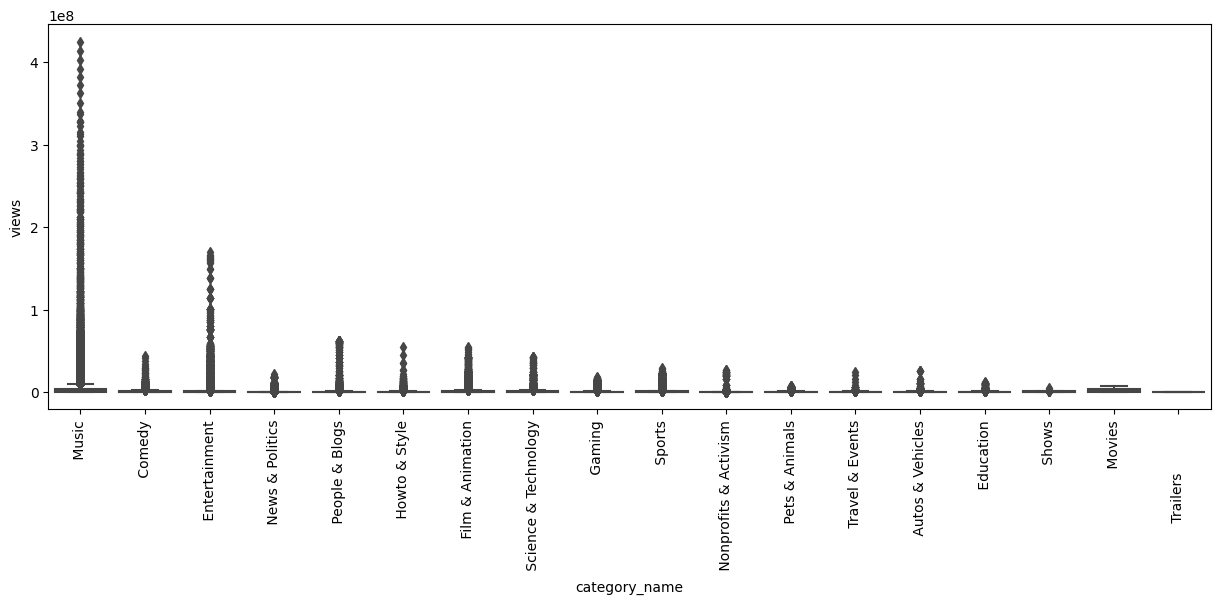

In [105]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='category_name', y='views', data=full_df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

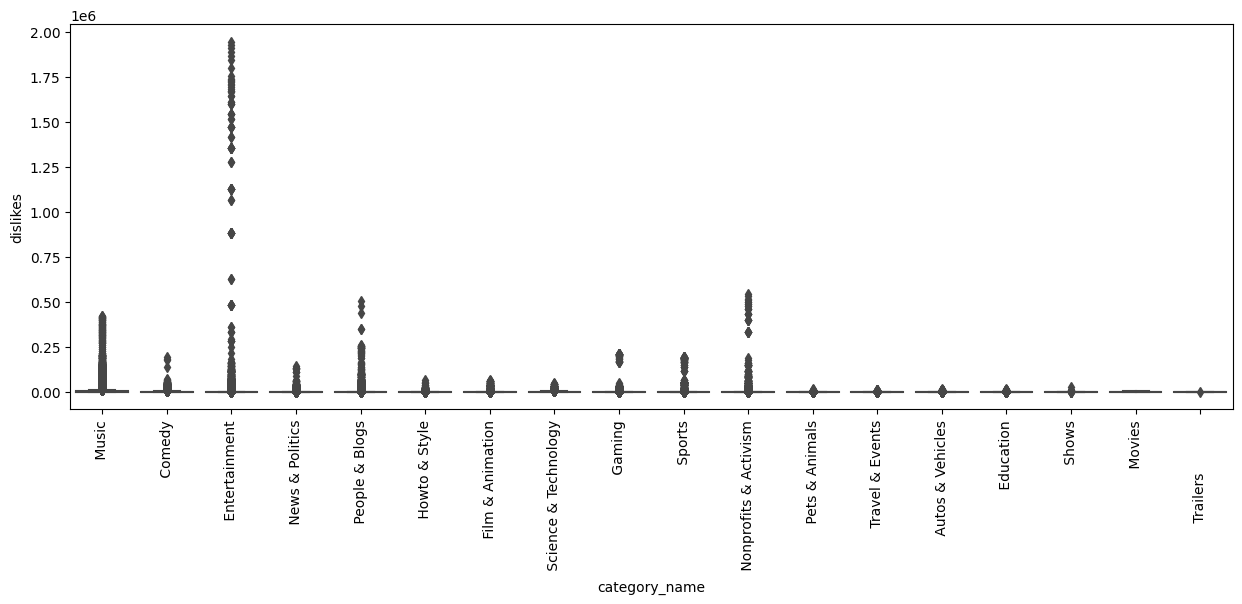

In [111]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='category_name', y='dislikes', data=full_df)
plt.xticks(rotation=90)


In [112]:
full_df['likes'].describe()

count     1067342
unique      74045
top             0
freq       464273
Name: likes, dtype: int64

In [116]:
full_df['likes_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comments_rate'] = (full_df['comment_count']/full_df['views'])*100


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

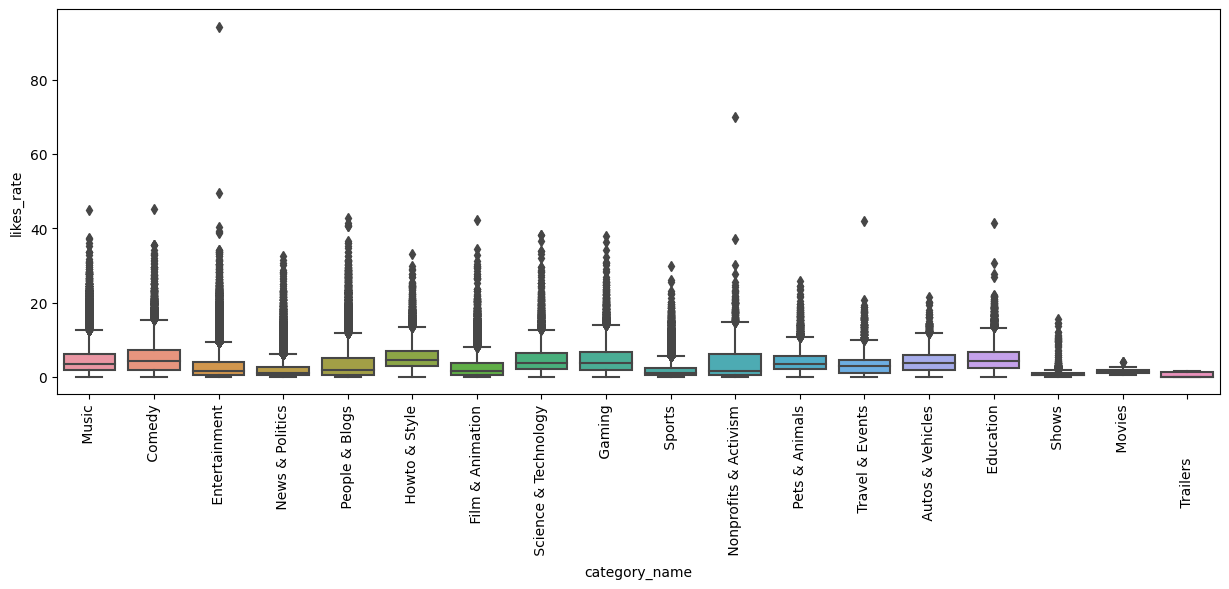

In [117]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='category_name', y='likes_rate', data=full_df)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

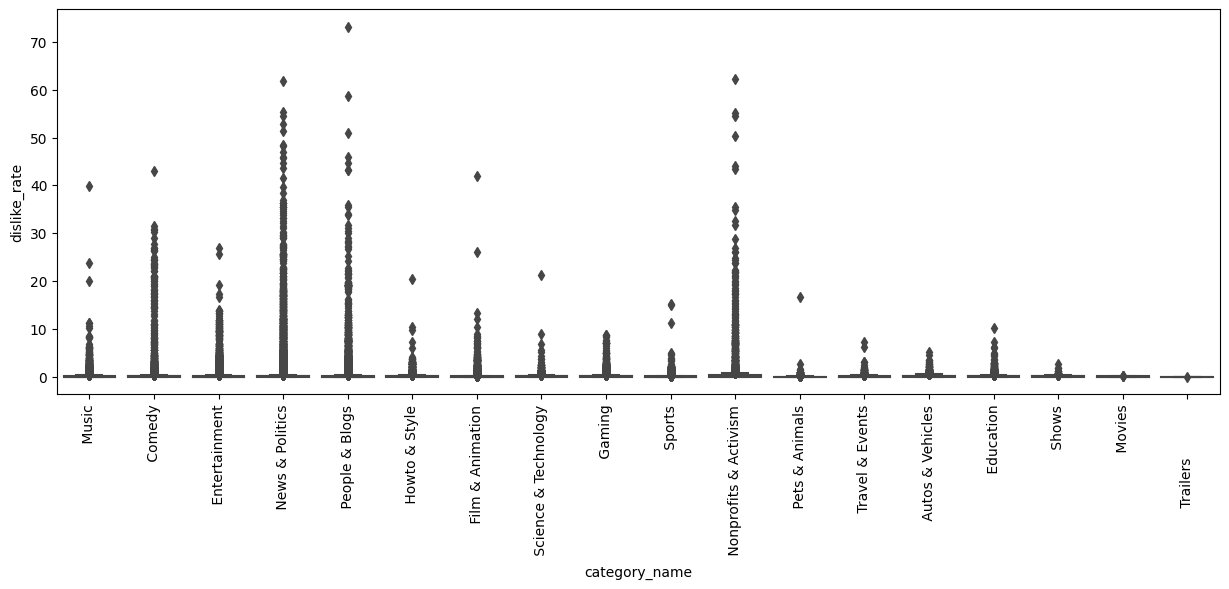

In [119]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='category_name', y='dislike_rate', data=full_df)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

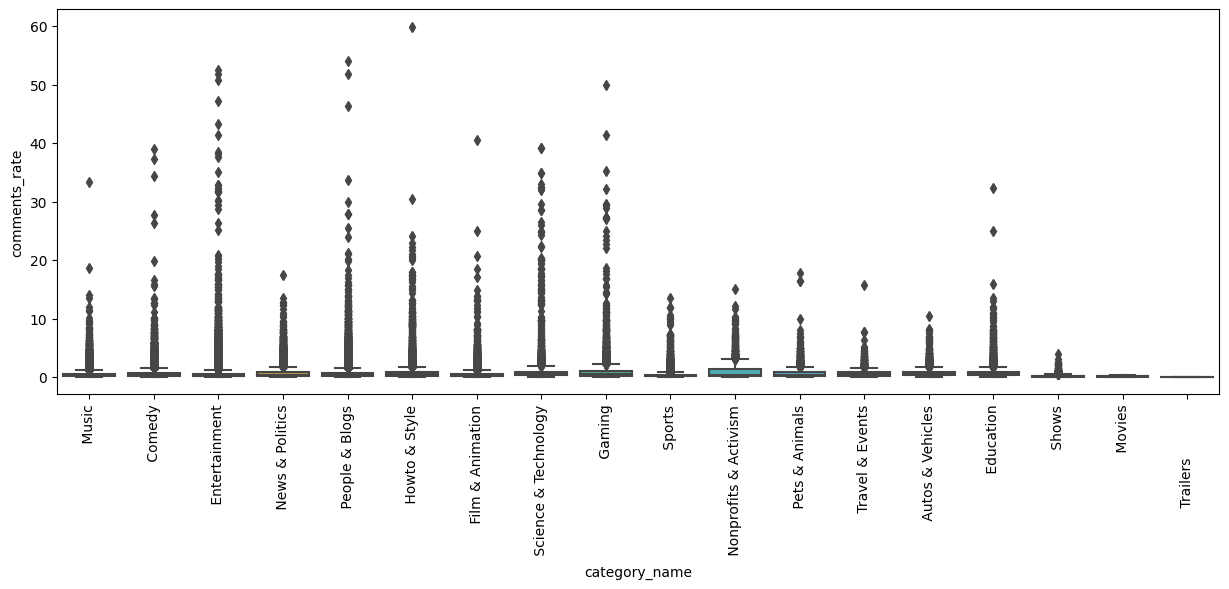

In [120]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='category_name', y='comments_rate', data=full_df)
plt.xticks(rotation=90)


In [122]:
full_df[[ 'views', 'likes', 'dislikes']].corr()

,views,dislikes
views,1.000000,0.421653
dislikes,0.421653,1.000000


<AxesSubplot: >

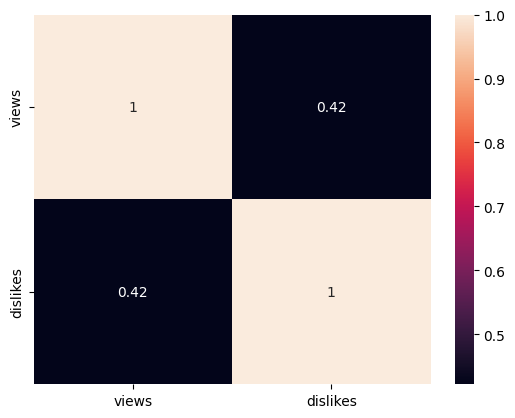

In [123]:
sns.heatmap(full_df[[ 'views', 'likes', 'dislikes']].corr(), annot=True)

In [124]:
full_df.groupby('country')['views'].sum().sort_values(ascending=False).head(10)

country
GB    2.300692e+11
US    9.667177e+10
CA    4.689198e+10
IN    3.961096e+10
DE    2.464512e+10
FR    1.710090e+10
KR    1.468915e+10
MX    1.384969e+10
RU    9.806495e+09
JP    5.377467e+09
Name: views, dtype: float64

count the number of videos in the channel by video id

In [126]:
full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).head(10)

channel_title
The Late Show with Stephen Colbert        984
WWE                                       804
Late Night with Seth Meyers               773
VikatanTV                                 763
TheEllenShow                              743
Jimmy Kimmel Live                         707
The Tonight Show Starring Jimmy Fallon    705
PewDiePie                                 652
RadaanMedia                               651
The Late Late Show with James Corden      583
Name: video_id, dtype: int64

In [131]:
cdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [132]:
cdf.head(20)

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
5,Jimmy Kimmel Live,707
6,The Tonight Show Starring Jimmy Fallon,705
7,PewDiePie,652
8,RadaanMedia,651
9,The Late Late Show with James Corden,583


In [133]:
import plotly.express as px

In [136]:
px.bar(data_frame=cdf[0:10], x='channel_title', y='total_videos', color='total_videos', title='Top 20 Channels with most videos')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'channel_title=%{x}<br>total_videos=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([984, 804, 773, 763, 743, 707, 705, 652, 651, 583], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['The Late Show with Stephen Colbert', 'WWE',
                          'Late Night with Seth Meyers', 'VikatanTV', 'TheEllenShow',
                          'Jimmy Kimmel Live', 'The Tonight Show Starring Jimmy Fallon',
                          'PewDiePie', 'RadaanMedia', 'The Late Late Show with James Corden'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([984, 804, 773, 763, 743, 707, 705, 652, 651, 583], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'total_videos'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Top 20 Channels with most videos'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'channel_title'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'total_videos'}}}
})

In [137]:
import string

In [138]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [139]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [140]:
punc_count('Hello, how are you?')

2

In [141]:
sample = full_df[0:1000]


In [142]:
# create a new column called punc_count and apply the function to the title column of the sample dataframe that count the number of punctuation in each title
sample['punc_count'] = sample['title'].apply(lambda x: punc_count(x))

C:\Users\rober\AppData\Local\Temp\ipykernel_22464\939501073.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
sample.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,country,comment_text,replies,category_name,likes_rate,dislike_rate,comments_rate,punc_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425,43420.0,...,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,NaN,NaN,Music,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794,1688.0,...,False,STill got a lot of packages. Probably will las...,CA,NaN,NaN,Comedy,12.594873,0.166363,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035,5339.0,...,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,NaN,NaN,Comedy,4.575843,0.167292,0.256342,3


<AxesSubplot: xlabel='punc_count', ylabel='views'>

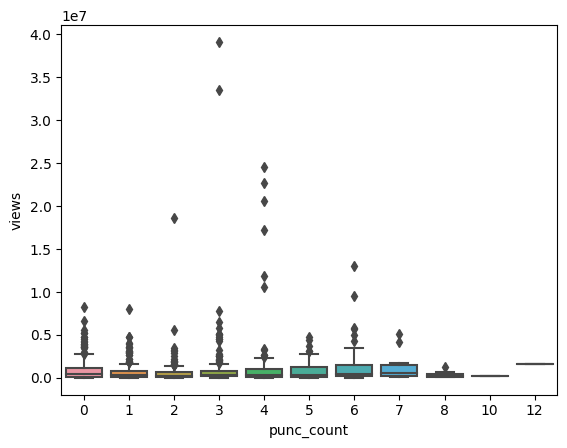

In [144]:
sns.boxplot(x='punc_count', y='views', data=sample)

In [145]:
sample['punc_count'].corr(sample['views'])

0.06447081087620593

<AxesSubplot: >

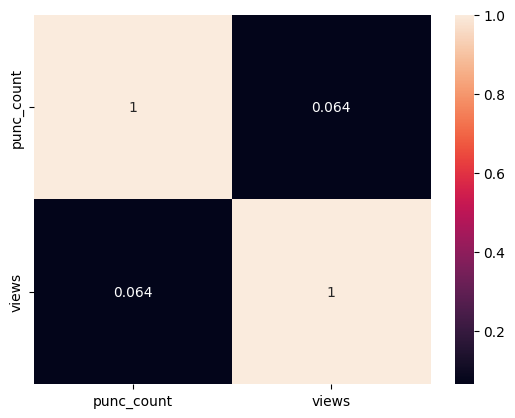

In [147]:
sns.heatmap(sample[[ 'punc_count', 'views']].corr(), annot=True)